In [61]:
using LinearAlgebra, PyCall, PyPlot, Crystalline
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/gridsan/aligho/.local/lib/python3.8/site-packages/numpy/__init__.py'>

In [65]:
function h3b(k::Vector{<:Real}) 
    t_0 = 0.5
    a_1 = [1, 0]
    a_2 = [0, 1]#[1/2, sqrt(3)/2]
    a_3 = a_1 - a_2
    Hk = [0 t_0 + cis(dot(k, a_2)) t_0 + cis(-dot(k, a_3)); t_0 + cis(-dot(k, a_2)) 0 t_0 + cis(-dot(k, a_1)); 
          t_0 + cis(dot(k, a_3)) t_0 + cis(dot(k, a_1)) 0]
    Es, Us = np.linalg.eigh(Hk)
    return Es, Us
end

function h3c(k::Vector{<:Real}) 
    t_0 = 0.5
    a_1 = [1, 0]
    a_2 = [0, 1]#[1/2, sqrt(3)/2]
    a_3 = a_1 - a_2
    Hk = [0 t_0 + cis(dot(k, a_1)) t_0 + cis(dot(k, a_2)); t_0 + cis(-dot(k, a_1)) 0 t_0 + cis(-dot(k, a_3)); 
          t_0 + cis(-dot(k, a_2)) t_0 + cis(dot(k, a_3)) 0]
    Es, Us = np.linalg.eigh(Hk)
    return Es, Us
end

h3c (generic function with 1 method)

In [46]:
kpath = Vector{Float64}[]

N = 100
for i in 1:N
    push!(kpath, 2π*[-1/3, 1/3]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[-1/3, 1/3]+2π*[2/3, 1/3]*i/N)
end

for i in 1:N
    push!(kpath, 2π*[1/3, 2/3]-2π*[1/3, 2/3]*i/N)
end



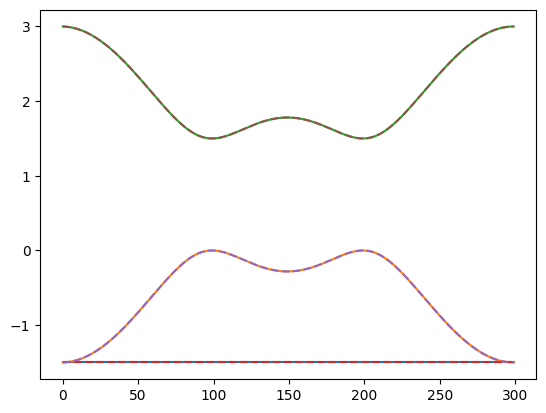

In [67]:
plot([x[1] for x in h3b.(kpath)]);
plot([x[1] for x in h3c.(kpath)], linestyle="dashed");

In [68]:
R3 = [0 0 1; 1 0 0; 0 1 0]
evectors = h3c([0, 0])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R3, evectors), digits=3)

3-element Vector{ComplexF64}:
 -0.5 + 0.0im
 -0.5 + 0.0im
  1.0 + 0.0im

In [72]:
evectors = h3c(2π*[-1/3, 1/3])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R3, evectors), digits=3)

3-element Vector{ComplexF64}:
 -0.5 + 0.866im
  1.0 - 0.0im
 -0.5 - 0.866im

In [70]:
evectors = h3c(2π*[1/3, 2/3])[2]
round.(np.einsum("ik, ij, jk-> k", conj.(evectors), R3, evectors), digits=3)

3-element Vector{ComplexF64}:
 -0.5 - 0.866im
  1.0 + 0.0im
 -0.5 + 0.866im

In [62]:
bandreps(13, 2)

BandRepSet (⋕13): 6 BandReps, sampling 8 LGIrreps (spin-1 w/ TR)
──────┬────────────────────────
      │ 1c  1c  1b  1b  1a  1a 
      │ A   E   A   E   A   E  
──────┼────────────────────────
 KA₁  │ ·   1   ·   1   1   ·  
 KA₂  │ 1   ·   ·   1   ·   1  
 KA₃  │ ·   1   1   ·   ·   1  
 Γ₁   │ 1   ·   1   ·   1   ·
 Γ₂Γ₃ │ ·   1   ·   1   ·   1
 K₁   │ ·   1   ·   1   1   ·  
 K₂   │ ·   1   1   ·   ·   1  
 K₃   │ 1   ·   ·   1   ·   1  
──────┼────────────────────────
 μ    │ 1   2   1   2   1   2  
──────┴────────────────────────
  KVecs (maximal only): KA, Γ, K